In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the Data

In [2]:
working_directory = os.getcwd()
print(working_directory)
data = pd.read_csv(f"{working_directory}/Input_Data/creditcard_post_exploration.csv") #Change the path to your dataset, if needed

c:\Users\teovr\Desktop\Projects\Predicting_Fraudulent_Transactions_With_Machine_Learning


## Features correlation

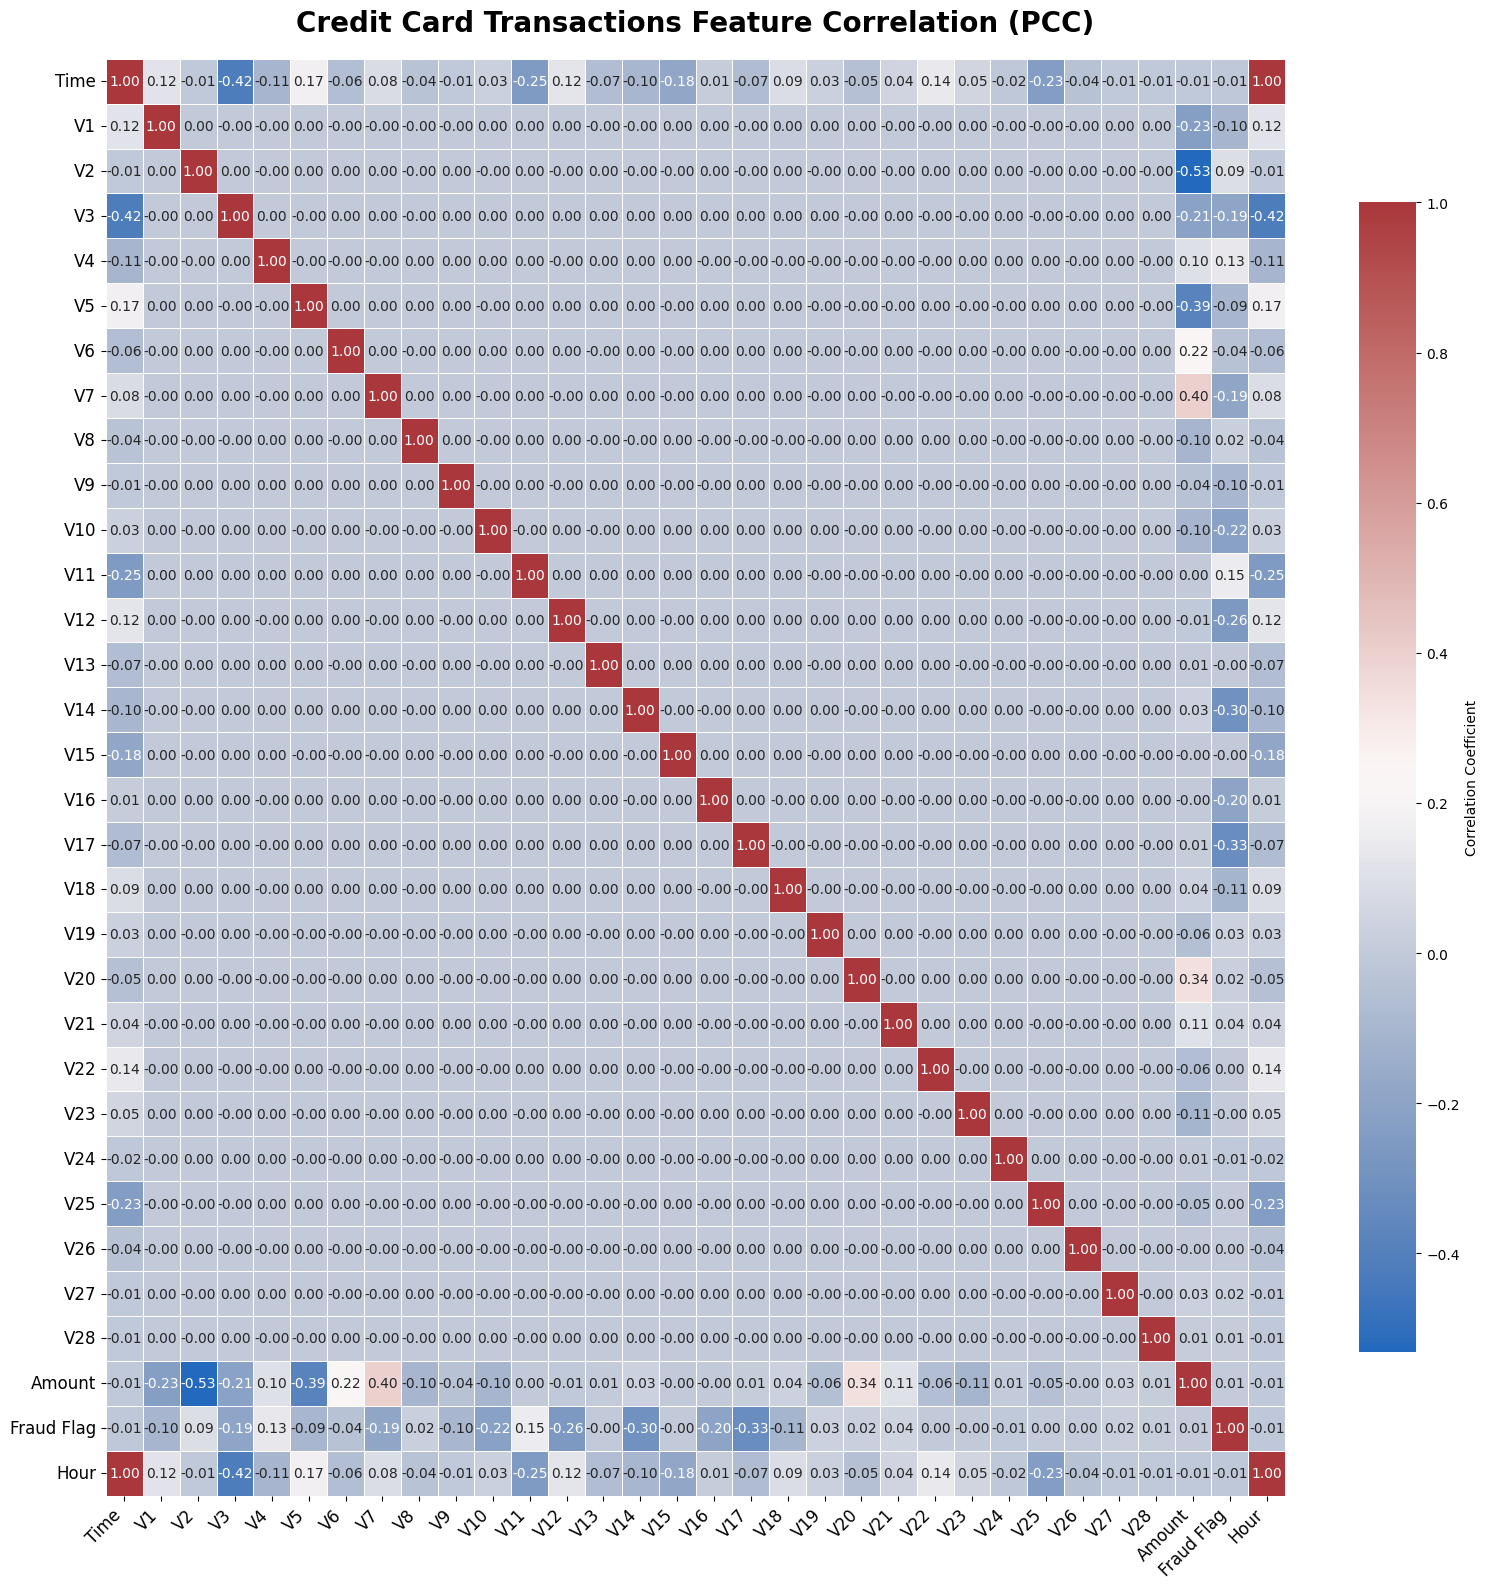

In [3]:
# Plot the correlation heatmap
plt.figure(figsize=(16, 16))
plt.title('Credit Card Transactions Feature Correlation (PCC)', fontsize=20, fontweight='bold', pad=20)

# Compute the correlation matrix
correlation_matrix = data.rename(columns={'Fraud_Flag': 'Fraud Flag', 'Transaction_Amount': 'Amount', 'Transaction_Time': 'Time'})
correlation_matrix = correlation_matrix.corr()

# Plot the heatmap with enhancements
sns.heatmap(
    correlation_matrix,
    annot=True,  # Add correlation values inside the heatmap
    fmt=".2f",  # Format the correlation values to 2 decimal places
    xticklabels=correlation_matrix.columns,
    yticklabels=correlation_matrix.columns,
    linewidths=0.5,  # Increase line width for better separation
    cmap="vlag",  # Use a diverging colormap for better contrast
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}  # Customize the color bar
)

# Customize tick labels
plt.xticks(fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12, rotation=0)

# Display the plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### As anticipated, there is no significant correlation among features V1 through V28. However, some of these features exhibit notable correlations with Time and Amount: V3 shows an inverse correlation with Time, while V7 and V20 are directly correlated with Amount, and V1 and V5 are inversely correlated with Amount.

#### Let’s visualize these relationships by plotting both the direct and inverse correlations on the same graph.

#### We’ll begin with the directly correlated pairs: {V20, Amount} and {V7, Amount}.

## Correlation Between Feature V20 and Transaction Amount by Fraud Status"
## and
## Correlation Between Feature V7 and Transaction Amount by Fraud Status

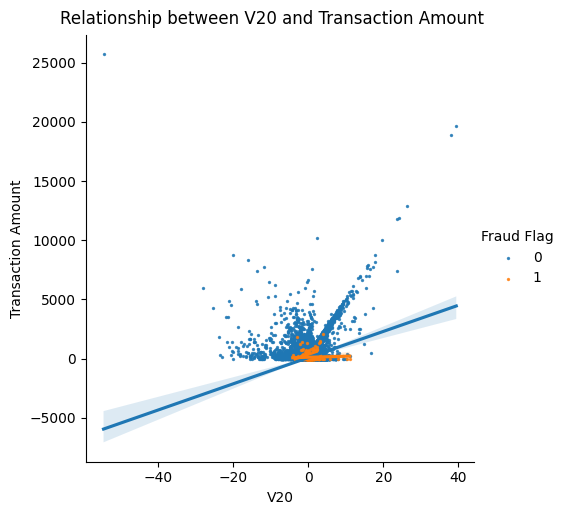

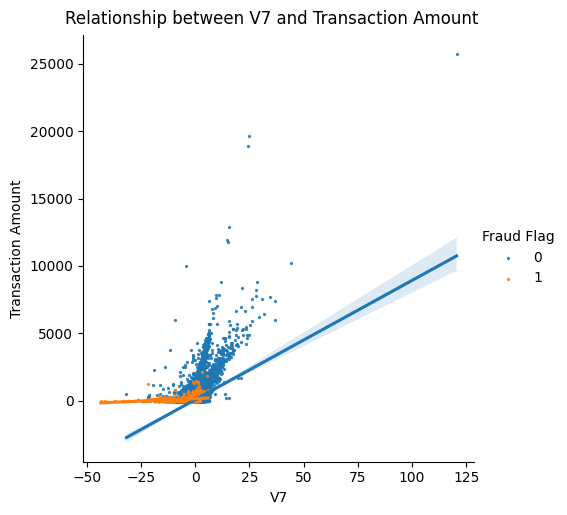

In [4]:
# Rename columns
data_lmplot = data.rename(columns={'Transaction_Amount': 'Transaction Amount', 'Fraud_Flag': 'Fraud Flag'})

# Plot the relationship between V20 and Transaction Amount
plot_v20 = sns.lmplot(
    x='V20', 
    y='Transaction Amount', 
    data=data_lmplot, 
    hue='Fraud Flag', 
    fit_reg=True, 
    scatter_kws={'s': 2}
)
plot_v20.fig.suptitle("Relationship between V20 and Transaction Amount", y=1.02) 
plot_v20.set_axis_labels("V20", "Transaction Amount")  

# Plot the relationship between V7 and Transaction Amount
plot_v7 = sns.lmplot(
    x='V7', 
    y='Transaction Amount', 
    data=data_lmplot, 
    hue='Fraud Flag', 
    fit_reg=True, 
    scatter_kws={'s': 2}
)
plot_v7.fig.suptitle("Relationship between V7 and Transaction Amount", y=1.02)  
plot_v7.set_axis_labels("V7", "Transaction Amount")  

# Show the plots
plt.show()

##### We can observe that the two pairs of features are positively correlated (the regression lines for Class = 0 have a steeper positive slope, while the regression lines for Class = 1 have a gentler positive slope).

##### Next, let's plot the inversely correlated features.

## Correlation Between Feature V2 and Transaction Amount by Fraud Status
## and 
## Correlation Between Feature V5 and Transaction Amount by Fraud Status

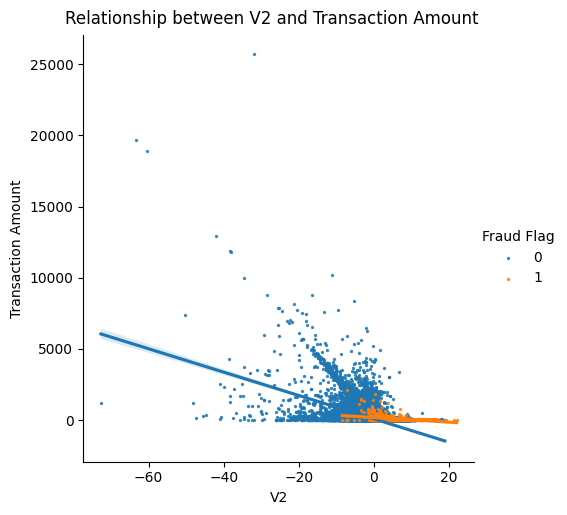

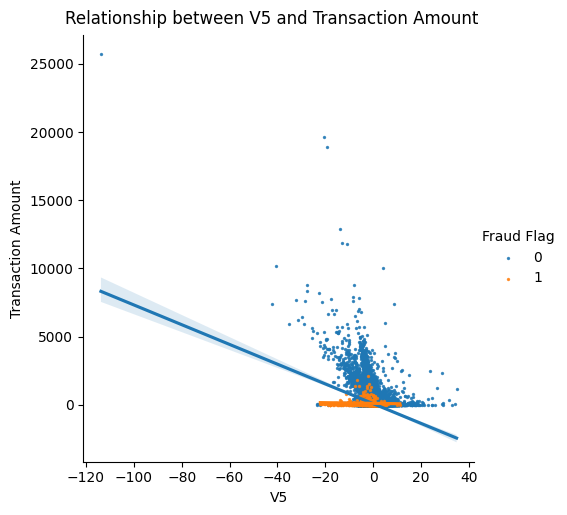

In [5]:
# Plot the relationship between V2 and Amount
plot_v2 = sns.lmplot(
    x='V2', 
    y='Transaction Amount', 
    data=data_lmplot, 
    hue='Fraud Flag', 
    fit_reg=True, 
    scatter_kws={'s': 2}
)
plot_v2.fig.suptitle("Relationship between V2 and Transaction Amount", y=1.02)  #
plot_v2.set_axis_labels("V2", "Transaction Amount")  

# Plot the relationship between V5 and Amount
plot_v5 = sns.lmplot(
    x='V5', 
    y='Transaction Amount', 
    data=data_lmplot, 
    hue='Fraud Flag', 
    fit_reg=True, 
    scatter_kws={'s': 2}
)
plot_v5.fig.suptitle("Relationship between V5 and Transaction Amount", y=1.02)  
plot_v5.set_axis_labels("V5", "Transaction Amount")  

# Show the plots
plt.show()

##### We can observe that the two pairs of features are inversely correlated (the regression lines for Class = 0 have a steeper negative slope, while the regression lines for Class = 1 have a gentler negative slope).

## Features density plot

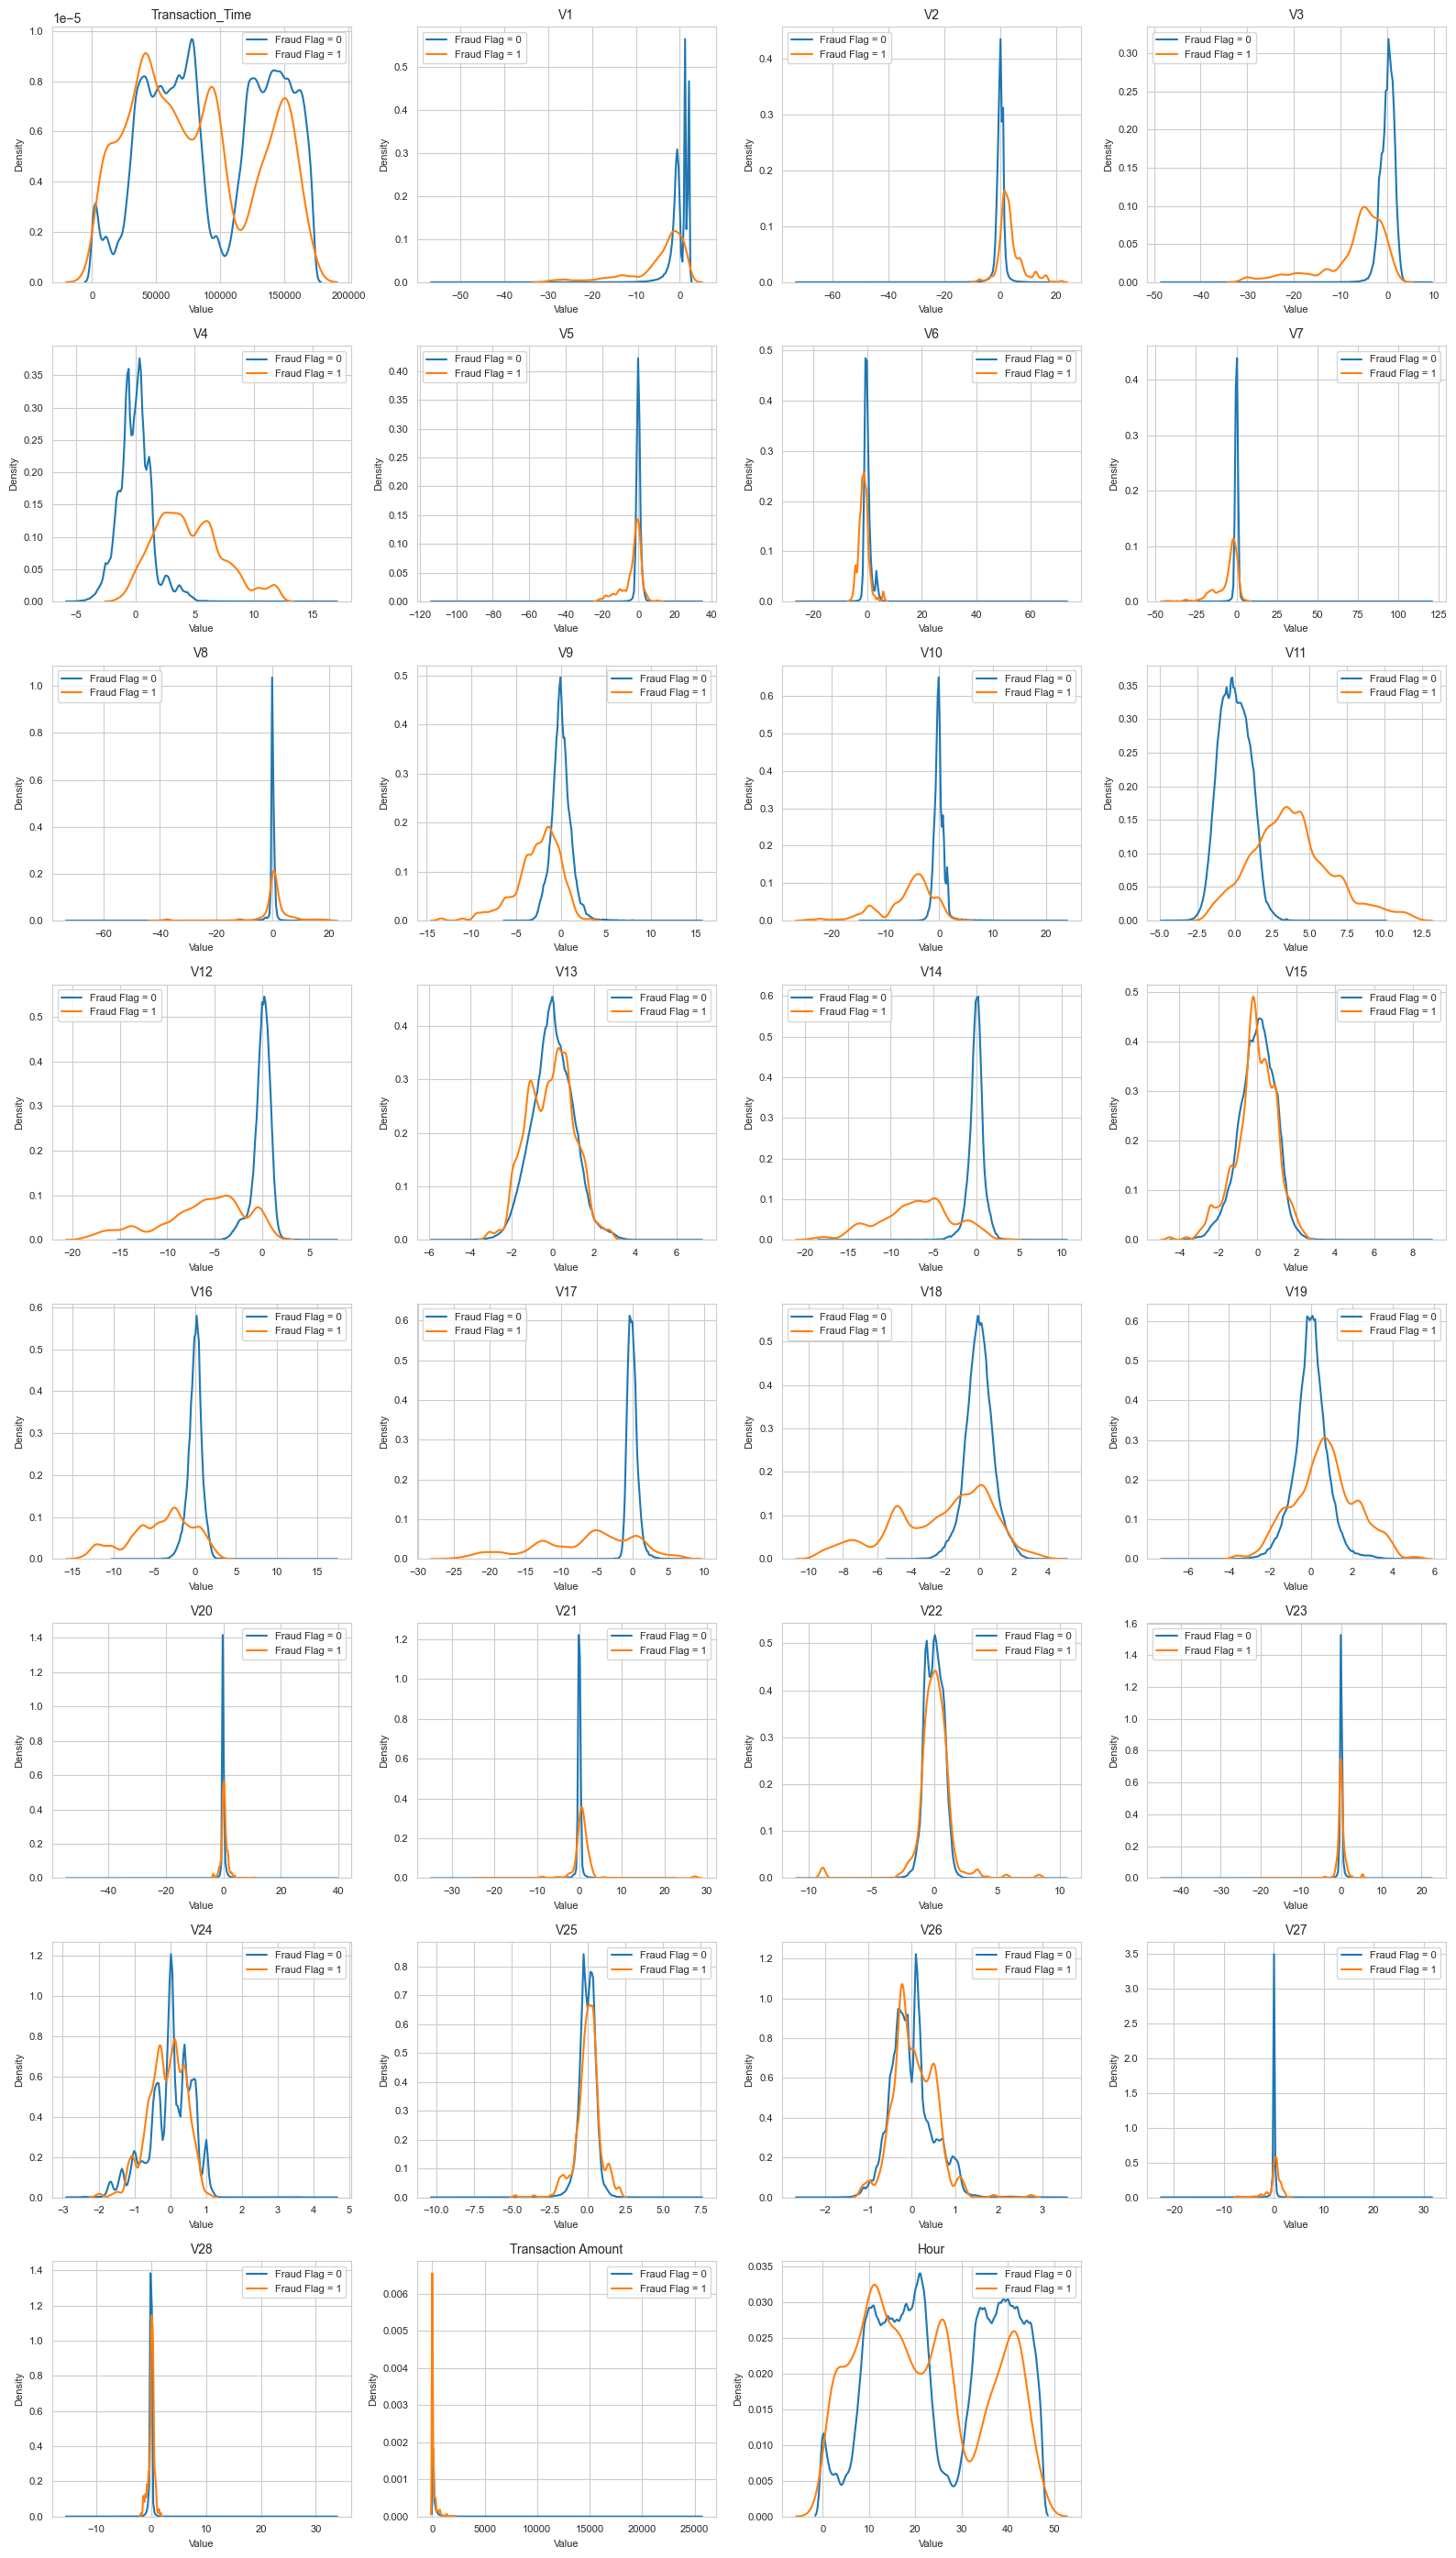

In [6]:
# Rename columns
data_feature_density = data.rename(columns={'Transaction_Amount': 'Transaction Amount', 'Fraud_Flag': 'Fraud Flag'})

# Filter features and prepare data for density plots
feature_density = data_feature_density.columns.values  
t0 = data_feature_density.loc[data_feature_density['Fraud Flag'] == 0]  # Non-fraudulent transactions
t1 = data_feature_density.loc[data_feature_density['Fraud Flag'] == 1]  # Fraudulent transactions

# Select features with non-zero variance in both classes
valid_features = [
    feature for feature in feature_density 
    if t0[feature].var() > 0 and t1[feature].var() > 0
]

# Set plot style and figure size
sns.set_style('whitegrid')
fig, axes = plt.subplots(8, 4, figsize=(16, 28))  # Create subplots for density plots
axes = axes.flatten()  # Flatten the axes array for easier indexing

# Plot density for each valid feature
for i, feature in enumerate(valid_features):
    sns.kdeplot(t0[feature], bw_adjust=0.5, label="Fraud Flag = 0", ax=axes[i])  # Non-fraud density
    sns.kdeplot(t1[feature], bw_adjust=0.5, label="Fraud Flag = 1", ax=axes[i])  # Fraud density
    axes[i].set_title(feature, fontsize=10)
    axes[i].set_xlabel("Value", fontsize=8)
    axes[i].set_ylabel("Density", fontsize=8)
    axes[i].tick_params(axis='both', which='major', labelsize=8)
    axes[i].legend(fontsize=8)

# Remove empty subplots
for j in range(len(valid_features), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

## Save Data to CSV

In [7]:
data.to_csv(f"{working_directory}/Input_Data/creditcard_post_correlation.csv", index=False)